# Data Clean
### Takes data labels it, and breaks it into one second chunks
#### David Saffo
#### 5/16/2017

In [1]:
import pandas as pd
import itertools
import numpy as np
from io import StringIO
import math
import scipy.stats.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [33]:
giaWalking = pd.read_csv("Gia Walking.csv", header = None, skiprows = 2)
giaRunning = pd.read_csv("Gia Running.csv", header = None, skiprows = 2)
giaSitting = pd.read_csv("Gia Sitting.csv", header = None, skiprows = 2)
giaSleeping = pd.read_csv("Gia Sleeping.csv", header = None, skiprows = 2)
giaStanding = pd.read_csv("Gia Standing.csv", header = None, skiprows = 2)
giaClimbing = pd.read_csv("Gia Climbing.csv", header = None, skiprows = 2)
ilonaWalking = pd.read_csv("Ilona Walking.csv", header = None, skiprows = 2)
ilonaRunning = pd.read_csv("Ilona Running.csv", header = None, skiprows = 2)
ilonaSitting = pd.read_csv("Ilona Sitting.csv", header = None, skiprows = 2)
ilonaSleeping = pd.read_csv("Ilona Sleeping.csv", header = None, skiprows = 2)
ilonaStanding = pd.read_csv("Ilona Standing.csv", header = None, skiprows = 2)
ilonaClimbing = pd.read_csv("Ilona Climbing.csv", header = None, skiprows = 2)
liliWalking = pd.read_csv("Lili Walking.csv", header = None, skiprows = 2)
liliRunning = pd.read_csv("Lili Running.csv", header = None, skiprows = 2)
liliSitting = pd.read_csv("Lili Sitting.csv", header = None, skiprows = 2)
liliSleeping = pd.read_csv("Lili Sleeping.csv", header = None, skiprows = 2)
liliStanding = pd.read_csv("Lili Standing.csv", header = None, skiprows = 2)
liliClimbing = pd.read_csv("Lili Climbing.csv", header = None, skiprows = 2)


In [3]:
def createDF(sub, act, data):
    data = data.drop(4,1)
    x = 0
    i = 0
    array = []
    d = []
    for index, row in data.iterrows():
        if (data.iloc[index,0] %2 != 0):
            array.append([data.iloc[index,1],data.iloc[index,2],data.iloc[index,3]])
        elif (data.iloc[index,0] % 2 == 0):
            d.append([sub , act, array])
            array = []
            i+=1

    d.pop(0)
    d.pop(-1)
    d.pop(-2)

    dftest = pd.DataFrame(d)
    
    return dftest

In [34]:
df = createDF("gia", "walking", giaWalking)
df = df.append(createDF("gia", "running", giaRunning), ignore_index=True)
df = df.append(createDF("gia", "sleeping", giaSleeping), ignore_index=True)
df = df.append(createDF("gia", "climbing", giaClimbing), ignore_index=True)
df = df.append(createDF("gia", "sitting", giaSitting), ignore_index=True)
df = df.append(createDF("gia", "standing", giaStanding), ignore_index=True)
df = df.append(createDF("ilona", "walking", ilonaWalking), ignore_index=True)
df = df.append(createDF("ilona", "running", ilonaRunning), ignore_index=True)
df = df.append(createDF("ilona", "sleeping", ilonaSleeping), ignore_index=True)
df = df.append(createDF("ilona", "climbing", ilonaClimbing), ignore_index=True)
df = df.append(createDF("ilona", "sitting", ilonaSitting), ignore_index=True)
df = df.append(createDF("ilona", "standing", ilonaStanding), ignore_index=True)
df = df.append(createDF("lili", "walking", liliWalking), ignore_index=True)
df = df.append(createDF("lili", "running", liliRunning), ignore_index=True)
df = df.append(createDF("lili", "sleeping", liliSleeping), ignore_index=True)
df = df.append(createDF("lili", "climbing", liliClimbing), ignore_index=True)
df = df.append(createDF("lili", "sitting", liliSitting), ignore_index=True)
df = df.append(createDF("lili", "standing", liliStanding), ignore_index=True)

In [35]:
temp = []
a = []
mag = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    mag = []
    for j in range(len(temp)):
        x = temp[j][0]
        y = temp[j][1]
        z = temp[j][2]
    
        magnitude = math.sqrt(x ** 2 + y ** 2 + z ** 2)
        
        mag.append(magnitude)
       
    a.append(mag)

df.insert(3, "magnitude", a)
    
    

In [36]:
df.head()

,0,1,2,magnitude
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[9.918669265581952, 9.918669265581952, 9.91866..."
1,gia,walking,"[[-10.9, 0.2, -1.2], [-9.9, -0.7, -2.1], [-9.9...","[10.96767979109529, 10.144456614328833, 10.144..."
2,gia,walking,"[[-8.5, -4.4, -3.5], [-8.5, -4.4, -3.5], [-8.5...","[10.191172650877817, 10.191172650877817, 10.19..."
3,gia,walking,"[[-7.2, 0.0, -1.2], [-7.2, 0.0, -1.2], [-7.2, ...","[7.299315036357863, 7.299315036357863, 7.29931..."
4,gia,walking,"[[-7.3, 3.1, -2.0], [-6.3, 4.8, -2.4], [-6.3, ...","[8.179242018671413, 8.275868534480233, 8.27586..."


In [37]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    Max = max(temp)
       
    a.append(Max)

df.insert(4, "max", a)

In [38]:
df.head()

,0,1,2,magnitude,max
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245
1,gia,walking,"[[-10.9, 0.2, -1.2], [-9.9, -0.7, -2.1], [-9.9...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564
2,gia,walking,"[[-8.5, -4.4, -3.5], [-8.5, -4.4, -3.5], [-8.5...","[10.191172650877817, 10.191172650877817, 10.19...",19.783074
3,gia,walking,"[[-7.2, 0.0, -1.2], [-7.2, 0.0, -1.2], [-7.2, ...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474
4,gia,walking,"[[-7.3, 3.1, -2.0], [-6.3, 4.8, -2.4], [-6.3, ...","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935


In [39]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    Min = min(temp)
       
    a.append(Min)

df.insert(5, "min", a)

In [40]:
df.head()

,0,1,2,magnitude,max,min
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245,7.056203
1,gia,walking,"[[-10.9, 0.2, -1.2], [-9.9, -0.7, -2.1], [-9.9...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564,5.989157
2,gia,walking,"[[-8.5, -4.4, -3.5], [-8.5, -4.4, -3.5], [-8.5...","[10.191172650877817, 10.191172650877817, 10.19...",19.783074,7.156815
3,gia,walking,"[[-7.2, 0.0, -1.2], [-7.2, 0.0, -1.2], [-7.2, ...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474,6.953416
4,gia,walking,"[[-7.3, 3.1, -2.0], [-6.3, 4.8, -2.4], [-6.3, ...","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935,7.097183


In [41]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    std = np.std(x)
    a.append(std)

df.insert(6, "std", a)

In [42]:
df.head()

,0,1,2,magnitude,max,min,std
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245,7.056203,1.153909
1,gia,walking,"[[-10.9, 0.2, -1.2], [-9.9, -0.7, -2.1], [-9.9...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564,5.989157,2.539697
2,gia,walking,"[[-8.5, -4.4, -3.5], [-8.5, -4.4, -3.5], [-8.5...","[10.191172650877817, 10.191172650877817, 10.19...",19.783074,7.156815,2.980663
3,gia,walking,"[[-7.2, 0.0, -1.2], [-7.2, 0.0, -1.2], [-7.2, ...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474,6.953416,3.096813
4,gia,walking,"[[-7.3, 3.1, -2.0], [-6.3, 4.8, -2.4], [-6.3, ...","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935,7.097183,2.874046


In [43]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    skew = stats.skew(temp)
    a.append(skew)

df.insert(7, "skew", a)

In [44]:
df.head()

,0,1,2,magnitude,max,min,std,skew
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245,7.056203,1.153909,0.765104
1,gia,walking,"[[-10.9, 0.2, -1.2], [-9.9, -0.7, -2.1], [-9.9...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564,5.989157,2.539697,0.793941
2,gia,walking,"[[-8.5, -4.4, -3.5], [-8.5, -4.4, -3.5], [-8.5...","[10.191172650877817, 10.191172650877817, 10.19...",19.783074,7.156815,2.980663,1.883973
3,gia,walking,"[[-7.2, 0.0, -1.2], [-7.2, 0.0, -1.2], [-7.2, ...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474,6.953416,3.096813,1.265939
4,gia,walking,"[[-7.3, 3.1, -2.0], [-6.3, 4.8, -2.4], [-6.3, ...","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935,7.097183,2.874046,2.321100


In [45]:
temp = []
a = []

for i in range(len(df)):
    temp = df.iloc[i,3]
    kurt = stats.kurtosis(temp)
    a.append(kurt)
df.insert(8, "kurtosis", a)

In [46]:
df.head()

,0,1,2,magnitude,max,min,std,skew,kurtosis
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245,7.056203,1.153909,0.765104,4.308712
1,gia,walking,"[[-10.9, 0.2, -1.2], [-9.9, -0.7, -2.1], [-9.9...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564,5.989157,2.539697,0.793941,0.369980
2,gia,walking,"[[-8.5, -4.4, -3.5], [-8.5, -4.4, -3.5], [-8.5...","[10.191172650877817, 10.191172650877817, 10.19...",19.783074,7.156815,2.980663,1.883973,3.243430
3,gia,walking,"[[-7.2, 0.0, -1.2], [-7.2, 0.0, -1.2], [-7.2, ...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474,6.953416,3.096813,1.265939,1.202015
4,gia,walking,"[[-7.3, 3.1, -2.0], [-6.3, 4.8, -2.4], [-6.3, ...","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935,7.097183,2.874046,2.321100,6.854679


In [47]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    Mean = np.mean(x)
    a.append(Mean)

df.insert(9, "mean", a)

In [48]:
df.head()

,0,1,2,magnitude,max,min,std,skew,kurtosis,mean
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245,7.056203,1.153909,0.765104,4.308712,10.103423
1,gia,walking,"[[-10.9, 0.2, -1.2], [-9.9, -0.7, -2.1], [-9.9...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564,5.989157,2.539697,0.793941,0.369980,10.294204
2,gia,walking,"[[-8.5, -4.4, -3.5], [-8.5, -4.4, -3.5], [-8.5...","[10.191172650877817, 10.191172650877817, 10.19...",19.783074,7.156815,2.980663,1.883973,3.243430,10.325923
3,gia,walking,"[[-7.2, 0.0, -1.2], [-7.2, 0.0, -1.2], [-7.2, ...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474,6.953416,3.096813,1.265939,1.202015,10.695082
4,gia,walking,"[[-7.3, 3.1, -2.0], [-6.3, 4.8, -2.4], [-6.3, ...","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935,7.097183,2.874046,2.321100,6.854679,10.447635


In [49]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    Median = np.median(x)
    a.append(Median)

df.insert(10, "median", a)

In [50]:
df.head(len(df))

,0,1,2,magnitude,max,min,std,skew,kurtosis,mean,median
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245,7.056203,1.153909,0.765104,4.308712,10.103423,9.950879
1,gia,walking,"[[-10.9, 0.2, -1.2], [-9.9, -0.7, -2.1], [-9.9...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564,5.989157,2.539697,0.793941,0.369980,10.294204,10.104949
2,gia,walking,"[[-8.5, -4.4, -3.5], [-8.5, -4.4, -3.5], [-8.5...","[10.191172650877817, 10.191172650877817, 10.19...",19.783074,7.156815,2.980663,1.883973,3.243430,10.325923,9.721625
3,gia,walking,"[[-7.2, 0.0, -1.2], [-7.2, 0.0, -1.2], [-7.2, ...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474,6.953416,3.096813,1.265939,1.202015,10.695082,9.829547
4,gia,walking,"[[-7.3, 3.1, -2.0], [-6.3, 4.8, -2.4], [-6.3, ...","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935,7.097183,2.874046,2.321100,6.854679,10.447635,9.961426
5,gia,walking,"[[-11.1, 0.9, -1.5], [-9.6, 0.2, -1.3], [-9.6,...","[11.236992480196825, 9.689685237405806, 9.6896...",17.422399,6.024118,2.544375,0.892820,0.789222,10.442894,10.285913
6,gia,walking,"[[-6.9, 0.2, -2.8], [-6.9, 0.2, -2.8], [-6.9, ...","[7.449161026585477, 7.449161026585477, 7.44916...",21.328150,6.930368,2.601552,2.410858,7.126931,10.348865,9.946356
7,gia,walking,"[[-8.0, -3.3, -5.7], [-8.0, -3.3, -5.7], [-8.0...","[10.36243214694311, 10.36243214694311, 10.3624...",16.994999,7.976841,2.192396,1.313694,1.204022,10.400864,9.871677
8,gia,walking,"[[-14.8, -2.1, -1.9], [-14.8, -2.1, -1.9], [-1...","[15.068510211696445, 15.068510211696445, 15.06...",20.667608,6.041523,2.887888,1.176041,1.992694,10.506356,10.064790
9,gia,walking,"[[-8.3, -0.6, -1.3], [-8.3, -0.6, -1.3], [-8.3...","[8.422588675698227, 8.422588675698227, 8.42258...",17.962739,6.332456,2.623359,1.060948,0.685604,10.448195,9.877753


In [51]:
Y = df[1]
features = ['max', 'min', 'std', 'skew', 'mean', 'median', 'kurtosis']
X = df[features]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

[0.56000000000000005, 7]


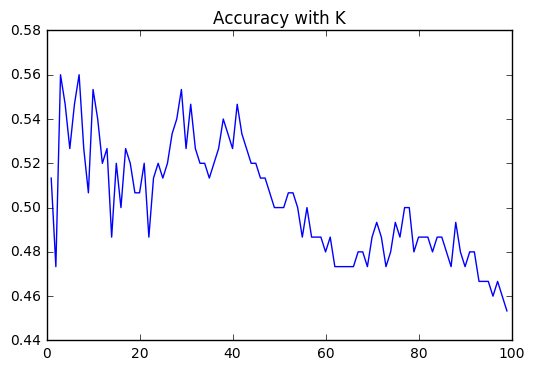

In [53]:
kResult= []
for n in range(1, 100,1):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)

    expected = y_test
    predicted = model.predict(X_test)
    acc = accuracy_score(expected, predicted)


    kResult.append([acc,n])
print(max(kResult))
#plotting peak k value preformance 
kResult = pd.DataFrame(kResult, columns=["n", "acc"])
plt.plot(kResult.acc, kResult.n)
plt.title("Accuracy with K")
plt.show()

Classification Report:
             precision    recall  f1-score   support

   climbing       0.30      0.43      0.35         7
    running       0.94      0.89      0.92        19
    sitting       0.36      0.63      0.46        30
   sleeping       0.67      0.22      0.33        36
   standing       0.46      0.44      0.45        27
    walking       0.81      0.81      0.81        31

avg / total       0.62      0.56      0.55       150

Confusion Matrix:
[[ 3  0  0  1  0  3]
 [ 1 17  0  0  0  1]
 [ 2  0 19  3  5  1]
 [ 2  0 19  8  6  1]
 [ 1  0 14  0 12  0]
 [ 1  1  1  0  3 25]]
Confusion matrix, without normalization
[[ 3  0  0  1  0  3]
 [ 1 17  0  0  0  1]
 [ 2  0 19  3  5  1]
 [ 2  0 19  8  6  1]
 [ 1  0 14  0 12  0]
 [ 1  1  1  0  3 25]]
Normalized confusion matrix
[[ 0.43  0.    0.    0.14  0.    0.43]
 [ 0.05  0.89  0.    0.    0.    0.05]
 [ 0.07  0.    0.63  0.1   0.17  0.03]
 [ 0.06  0.    0.53  0.22  0.17  0.03]
 [ 0.04  0.    0.52  0.    0.44  0.  ]
 [ 0.03  0.03  

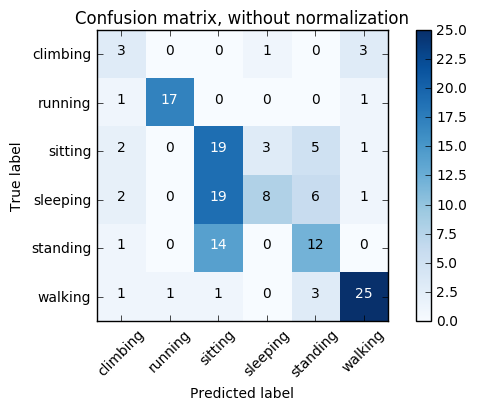

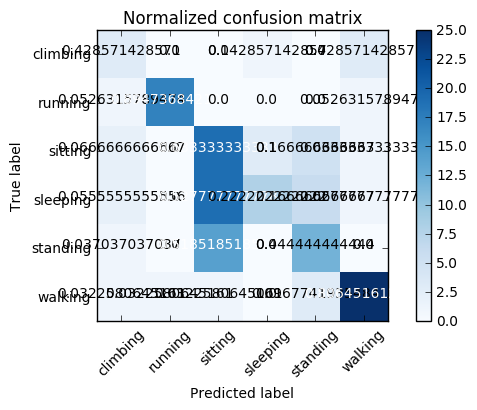

In [55]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)

class_names = ["climbing", "running", "sitting", "sleeping", "standing", "walking"]
expected = y_test
predicted = model.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(expected, predicted))
print("Confusion Matrix:")
print(metrics.confusion_matrix(expected, predicted))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(expected, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()